## Step 1 : Import necessary libraries

In [98]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

## Step 2: Load and explore the dataset

In [7]:
data_path = "star_classification.csv"  # Replace with actual dataset path
data = pd.read_csv(data_path)

In [9]:
# Display the first few rows of the dataset
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [32]:
data.sample(5)

,alpha,delta,u,g,r,i,z,class,redshift
38888,326.539415,0.168068,21.39445,20.59787,19.72345,19.42299,19.00101,0,0.315571
5296,179.128546,34.285102,25.91030,22.44138,21.87745,21.24339,20.71494,1,0.786576
60635,28.656588,-2.819098,22.74871,22.59362,21.80897,20.94380,20.68829,0,0.838881
64366,353.638705,27.131937,23.77266,25.07100,21.50692,20.38912,19.70875,0,0.570040
29402,238.871954,16.005412,22.22106,22.20666,21.11737,20.11942,20.04307,0,0.648763


In [13]:
# Summary statistics
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [15]:
data.sample(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
6293,1.237679e+18,351.990522,1.608815,23.81999,22.97889,22.62828,21.68229,21.88453,7717,301,2,276,1.036075e+19,GALAXY,0.752330,9202,57713,800
49075,1.237664e+18,124.343083,58.873001,22.06855,19.79148,18.18150,17.58180,17.22781,4294,301,6,136,2.108903e+18,GALAXY,0.252377,1873,54437,335
90620,1.237653e+18,60.834060,-5.512359,21.72969,20.49886,19.93484,19.60807,19.53565,1729,301,4,486,2.331912e+18,STAR,0.000541,2071,53741,630
96042,1.237666e+18,13.492072,0.336688,22.25550,22.03238,21.94676,21.78787,21.81793,4858,301,4,444,8.863255e+18,QSO,2.450415,7872,57279,620
33529,1.237679e+18,347.299258,13.042839,23.63128,20.37669,18.58748,17.90879,17.50044,7773,301,6,228,6.919813e+18,GALAXY,0.339263,6146,56265,115


In [17]:
data.shape , data.obj_ID.nunique()

((100000, 18), 78053)

In [19]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [21]:
data = data.drop(columns=['obj_ID','run_ID', 
    'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 
    'plate', 'MJD', 'fiber_ID'])


In [23]:
data.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


## Step 3: EDA

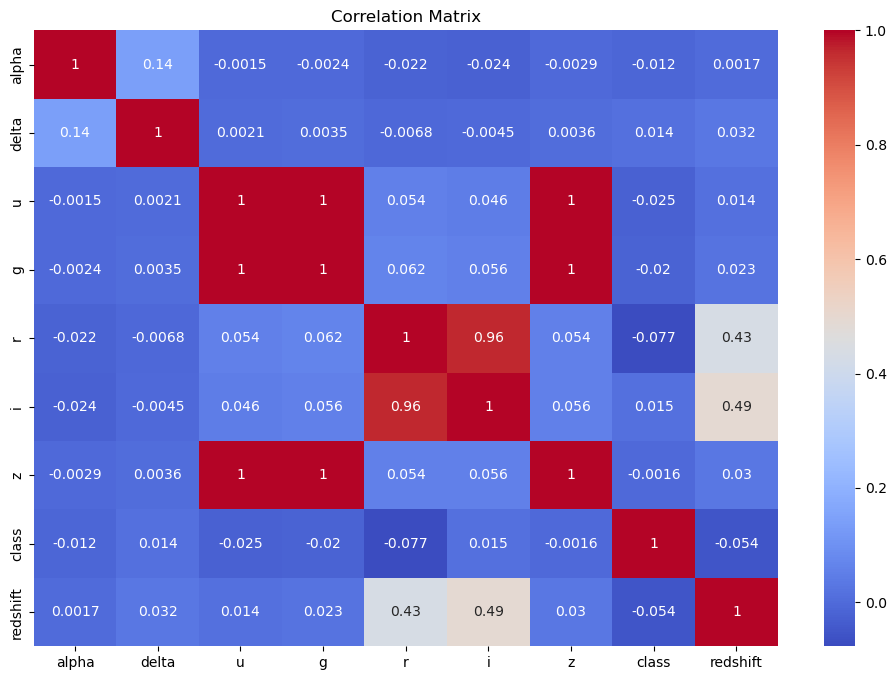

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode the 'class' column
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


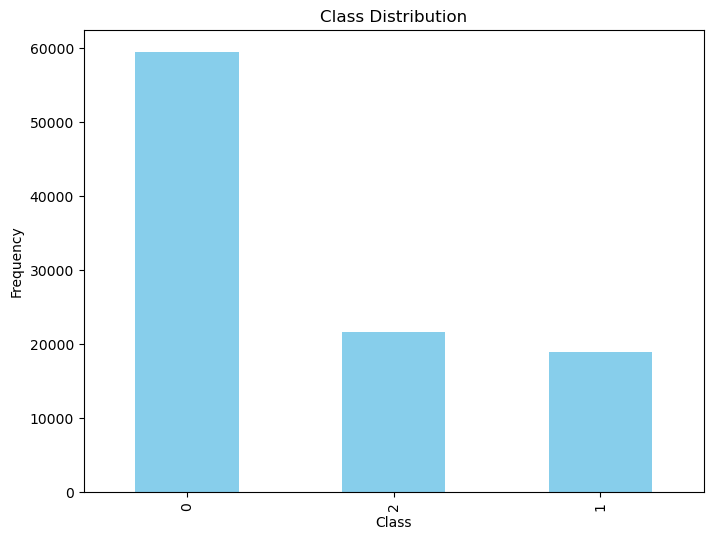

In [27]:
# Distribution of target classes
class_distribution = data["class"].value_counts()
plt.figure(figsize=(8, 6))
class_distribution.plot(kind="bar", color="skyblue")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.savefig("Graph.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Shruti\AppData\Local\Temp\ipykernel_18172\247783261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='redshift', data=data, palette='viridis')


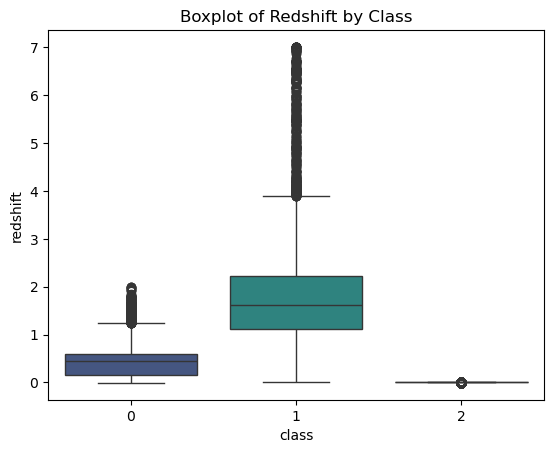

In [29]:
sns.boxplot(x='class', y='redshift', data=data, palette='viridis')
plt.title("Boxplot of Redshift by Class")
plt.show()


# Step 4: Data preprocessing


In [114]:
data.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64

In [115]:
data.sample()

,alpha,delta,u,g,r,i,z,class,redshift
55752,349.749523,-0.877109,22.24615,23.16306,22.12376,21.57775,21.38406,0,0.949756


In [117]:
# Feature scaling
scaler = StandardScaler()
features = data.drop(columns=["class"])  # Assuming 'class' is the target variable
scaled_features = scaler.fit_transform(features)

In [118]:
# Encode target labels
data["class"] = data["class"].astype('category').cat.codes

In [119]:
# Split the data
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
X.head()

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


In [121]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int8

In [ ]:
#y[0]

# Step 5: Train and evaluate models

In [123]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [125]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"{name} Results:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("\n")

Decision Tree Results:
Accuracy: 0.9649333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17845
           1       0.91      0.91      0.91      5700
           2       1.00      1.00      1.00      6455

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000

Confusion Matrix:
 [[17327   492    26]
 [  505  5195     0]
 [   29     0  6426]]


Random Forest Results:
Accuracy: 0.9771
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     17845
           1       0.96      0.92      0.94      5700
           2       0.99      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Mat

C:\Users\Shruti\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Accuracy: 0.7474333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.82     17845
           1       0.25      0.01      0.02      5700
           2       0.98      0.75      0.85      6455

    accuracy                           0.75     30000
   macro avg       0.65      0.58      0.56     30000
weighted avg       0.68      0.75      0.68     30000

Confusion Matrix:
 [[17525   214   106]
 [ 5626    73     1]
 [ 1630     0  4825]]




C:\Users\Shruti\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 0.9756666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17845
           1       0.96      0.93      0.94      5700
           2       0.99      0.99      0.99      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix:
 [[17567   209    69]
 [  412  5286     2]
 [   38     0  6417]]




# Step 6: Hyperparameter tuning (example with Random Forest)

In [127]:
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [None, 10],   
    'min_samples_split': [2, 5] 
}
grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1  
)
X_train_sample = X_train[:1000] 
y_train_sample = y_train[:1000]
grid_search.fit(X_train_sample, y_train_sample)

print("Best Random Forest Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


# Step 7: Visualizations

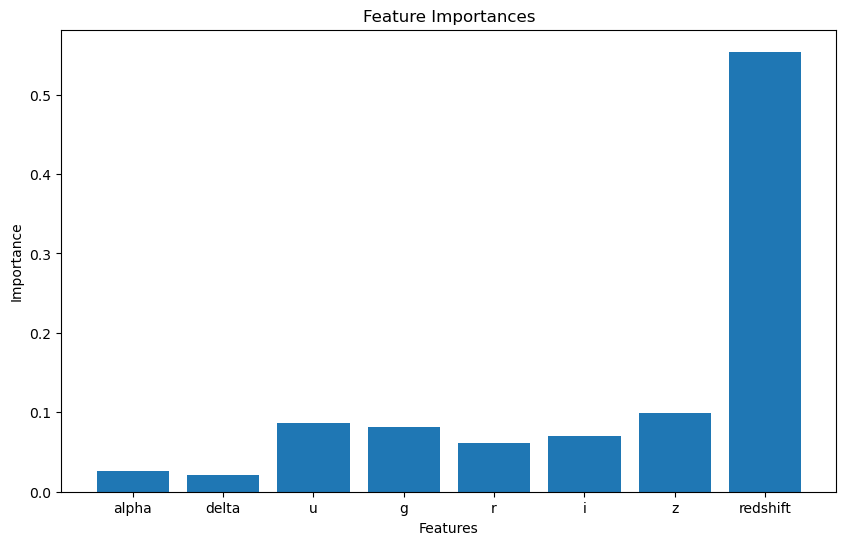

In [129]:
# Feature importance for Random Forest
best_rf = grid_search.best_estimator_
feature_importances = best_rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=features.columns)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


### Selecting champion model as random forest classifier

In [133]:
#grid_search.best_params_

In [135]:
model = RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [137]:
## evaluating results 

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.9772666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     17845
           1       0.96      0.92      0.94      5700
           2       0.99      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix:
 [[17607   192    46]
 [  441  5258     1]
 [    2     0  6453]]


In [139]:
import joblib

# Save the model to a file
joblib.dump(model, 'stellar_model_rfc.pkl')


['stellar_model_rfc.pkl']

In [141]:
## just for checking

In [143]:
#import joblib

# Load the model
#model = joblib.load('stellar_model_rfc.pkl')


In [145]:
'''model.predict([[-0.44563362, -0.43460358,  0.42552871,  0.0597546 ,  0.05492616,
        0.40396155,  0.0460074 ,  0.00393658, -0.44553451,  0.        ,
       -0.95255272, -0.71894695,  0.22860866,  0.07955728,  0.22863291,
        0.42320321, -1.02134224, -0.76090792]])'''

'model.predict([[-0.44563362, -0.43460358,  0.42552871,  0.0597546 ,  0.05492616,\n        0.40396155,  0.0460074 ,  0.00393658, -0.44553451,  0.        ,\n       -0.95255272, -0.71894695,  0.22860866,  0.07955728,  0.22863291,\n        0.42320321, -1.02134224, -0.76090792]])'

In [147]:
print("Number of features the model was trained on:", model.n_features_in_)

Number of features the model was trained on: 8
